<a href="https://colab.research.google.com/github/RFHertel/ESOF-4011/blob/main/Lab_6_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networks ESOF 4011 Lab 6 Solution**

Lab Instructor: Robert Hertel

Note: Please share all links with me in the future by pressing share in the top right corner

Introduction Format:

Student Name: Robert Hertel

Sudent ID: XXXXXX

Lab No.: 6 

Colab link: https://colab.research.google.com/drive/1KaZ7twy7ava5UHSLkhY4ER1oeWndg7Ho



# **Load the data and create train-test splits**

In [ ]:
import tensorflow.keras as keras
print("Using Keras",keras.__version__)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split

%matplotlib inline

Using Keras 2.4.0


In [ ]:
pip install openml

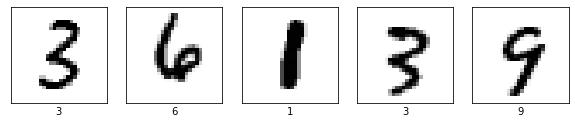

In [ ]:
# Global imports and settings
mnist = oml.datasets.get_dataset(554)
X, y, _, _ = mnist.get_data(target=mnist.default_target_attribute, dataset_format='array');
X = X.reshape(70000, 28, 28)
# Take some random examples
from random import randint
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
 n = randint(0,70000)
 axes[i].imshow(X[n], cmap=plt.cm.gray_r)
 axes[i].set_xticks([])
 axes[i].set_yticks([])
 axes[i].set_xlabel("{}".format(y[n]))
plt.show();



In [ ]:
# For MNIST, there exists a predefined stratified train-test split of 60000-10000. We therefore don't shuffle or stratify here.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000)
print("Training set: ",X_train.shape)
print("Test set: ",X_test.shape)

Training set:  (60000, 28, 28)
Test set:  (10000, 28, 28)


# **Exercise 1: Preprocessing**

Normalize the data: map each feature value from its current representation (an integer between 0
and 255) to a floating-point value between 0 and 1.0.

Store the floating-point values in x_train_normalized and x_test_normalized.

Map the class label to a on-hot-encoded value. Store in y_train_encoded and y_test_encoded.

In [ ]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# **Exercise 2: Create a deep neural net model**

Implement a create_model function which defines the topography of the deep neural net, specifying the
following:

The number of layers in the deep neural net: Use 2 dense layers for now.

The number of nodes in each layer: these are parameters of your function.

Any regularization layers. Add at least one dropout layer.

The optimizer and learning rate. Make the learning rate a parameter of your function as well.

Consider:

What should be the shape of the input layer?

Which activation function you will need for the last layer, since this is a 10-class classification
problem?


We can now build a simple neural network for MNIST:

One dense hidden ReLU layer with 512 nodes
Input from a 28x28 matrix
Output softmax layer with 10 nodes

In [ ]:
### Create and compile a 'deep' neural net
image_size = 784 # 28*28
num_classes = 10 # ten unique digits

def create_model(layer_1_units=32, layer_2_units=10, learning_rate=0.001, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(layer_1_units, activation='relu', input_shape=(image_size,)))
    model.add(Dropout(0.2))
    model.add(Dense(layer_2_units, activation='softmax'))
    model.summary()
    sgd = SGD(lr=learning_rate, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model



# **Exercise 3: Create a training funtion**

In [ ]:
def train_model(model, x_train, y_train, x_test, y_test, validation_split=0.1, epochs=5, batch_size=128):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, verbose=True)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


# **Exercise 4: Evaluate the model**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
422/422 [==============================] - 3s 3ms/step - loss: 1.9982 - accuracy: 0.3309 - val_loss: 1.0028 - val_accuracy: 0.7985
Epoch 2/5
422/422 [==============================] - 1s 2ms/step - loss: 0.9762 - accuracy: 0.7329 - val_loss: 0.6259 - val_accuracy: 0.8505
Epoch 3/5
422/422 [==============================] - 1s 2ms/step - loss: 0.7126 - accuracy: 0.7958 -

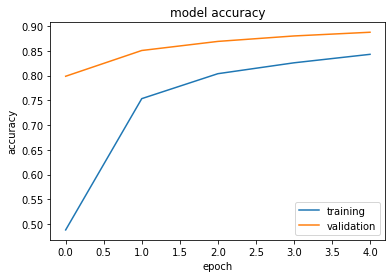

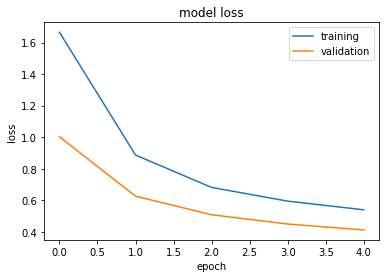


Test loss: 0.42
Test accuracy: 0.886


In [ ]:
model = create_model()
train_model(model, X_train, y_train, X_test, y_test, validation_split=0.1, epochs=5, batch_size=128)

# **Exercise 5: Optimize the model**

Try to optimize the model, either manually or with a tuning method. At least optimize the following:

the number of hidden layers

the number of nodes in each layer

the amount of dropout layers and the dropout rate

In [ ]:
#changed learning rate to 0.1, dropout to 0.2 and layer1 nodes to 64

def create_model(layer_1_units=64, layer_2_units=10, learning_rate=0.1, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(layer_1_units, activation='relu', input_shape=(image_size,)))
    #model.add(Dense(layer_1_units, activation='relu', input_shape=(image_size,))) If want to add another layer. It wasn't necessary in this case but can help
    model.add(Dropout(0.2))
    model.add(Dense(layer_2_units, activation='softmax'))
    model.summary()
    sgd = SGD(lr=learning_rate, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [ ]:
def train_model(model, x_train, y_train, x_test, y_test, validation_split=0.1, epochs=5, batch_size=128):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, verbose=True)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
422/422 [==============================] - 1s 3ms/step - loss: 0.5915 - accuracy: 0.8123 - val_loss: 0.1687 - val_accuracy: 0.9505
Epoch 2/5
422/422 [==============================] - 1s 2ms/step - loss: 0.2050 - accuracy: 0.9364 - val_loss: 0.1327 - val_accuracy: 0.9615
Epoch 3/5
422/422 [==============================] - 1s 2ms/step - loss: 0.1671 - accuracy: 0.9483

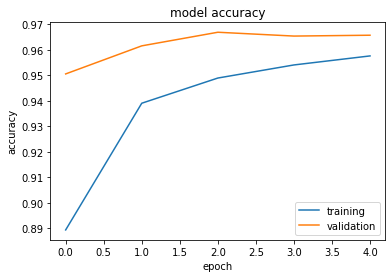

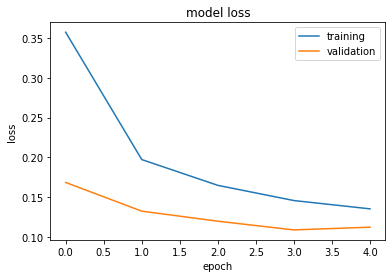


Test loss: 0.135
Test accuracy: 0.96


In [ ]:
model = create_model()
train_model(model, X_train, y_train, X_test, y_test, validation_split=0.1, epochs=5, batch_size=128)

**Clear model weights if want to rerun the algortihm**

In [ ]:
tf.keras.backend.clear_session()